# Steps of Grover's Search Algorithms
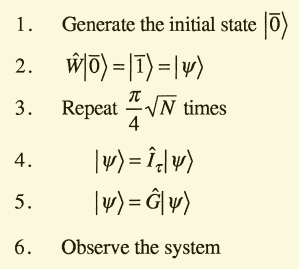

In [1]:
# Entire of the following description of Grover's search algorithm come from the a paper of:
# ventura and Martinez in 2000

In [2]:
# The state that we want to find is |0110>
goal_binary = input('Enter a Binary number:')
goal_dec = int(goal_binary, 2)
print('binary form of our goal:   ',goal_binary,';      decimal form of our goal: ',goal_dec)

Enter a Binary number:1010101
binary form of our goal:    1010101 ;      decimal form of our goal:  85


In [3]:
n = len(goal_binary)               # Number of qubits we need to use
N = 2**n                           # Number of quantum basis for the system
print('Number of qubits in system:  ',n,';  Number of basis states:',N)

Number of qubits in system:   7 ;  Number of basis states: 128


In [4]:
from qiskit import QuantumRegister, QuantumCircuit,ClassicalRegister
from qiskit.quantum_info import Statevector

# 1- Generate the initial state |0...0>

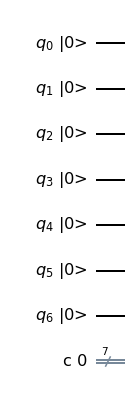

<IPython.core.display.Latex object>

In [5]:
qc = QuantumCircuit(n,n)
display(qc.draw('mpl',initial_state=True),Statevector(qc).draw('latex'))

# 2- Apply Walsh Hadamard on all qubits

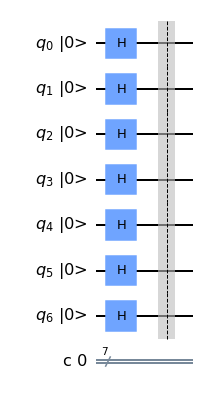

<IPython.core.display.Latex object>

In [6]:
qc.h(range(n))
qc.barrier()
display(qc.draw('mpl',initial_state=True),Statevector(qc).draw('latex'))

# 3- Iteratation by Grover Algorithm

In [7]:
from math import pi,sqrt,floor
Iter = floor((pi/4)*sqrt(N)) # Number of iteration that we need 
print('Required number of iterations:   ',Iter)

Required number of iterations:    8


In [8]:
import numpy as np    

## Required Operateors: R and G

In [9]:
def R():
    I = np.identity(N)
    I[goal_dec,goal_dec] = -1
    from qiskit.quantum_info import Operator
    R_op = Operator(I)
    n_qubits = []
    for i in range(n):
        n_qubits.append(i)    
    qc.unitary(R_op, qubits = n_qubits, label ='Uw')
    qc.barrier()
    return qc
    

In [10]:
def G():
    I = np.identity(N)
    I[0,0] = -1    
    from qiskit.quantum_info import Operator
    R_0 = Operator(I)
    qc.h(range(n))
    n_qubits = []  
    for i in range(n):
        n_qubits.append(i)    
    qc.unitary(R_0, qubits = n_qubits, label ='Uw')
    qc.h(range(n))
    qc.barrier()
    return qc



# Iteration

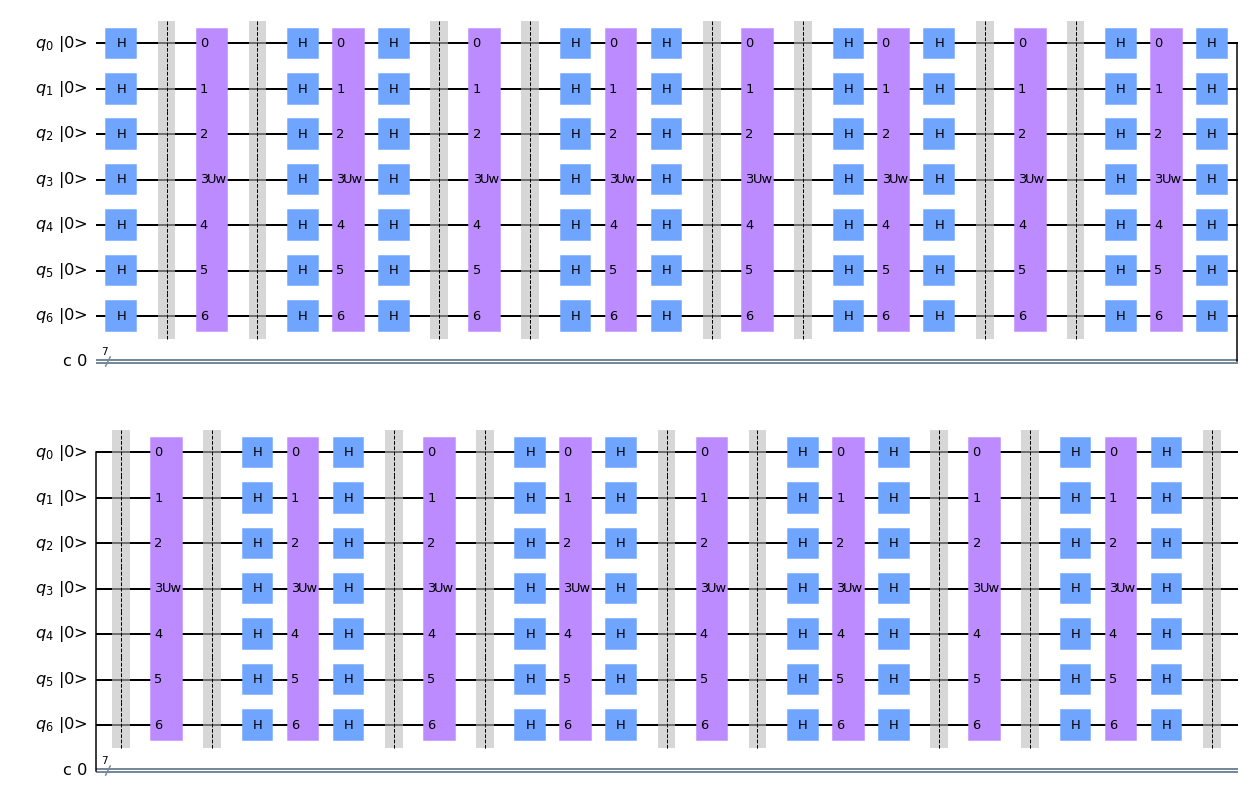

<IPython.core.display.Latex object>

In [11]:
for i in range(Iter):
    R()
    G()
display(qc.draw('mpl',initial_state=True),Statevector(qc).draw('latex'))

## Measurment

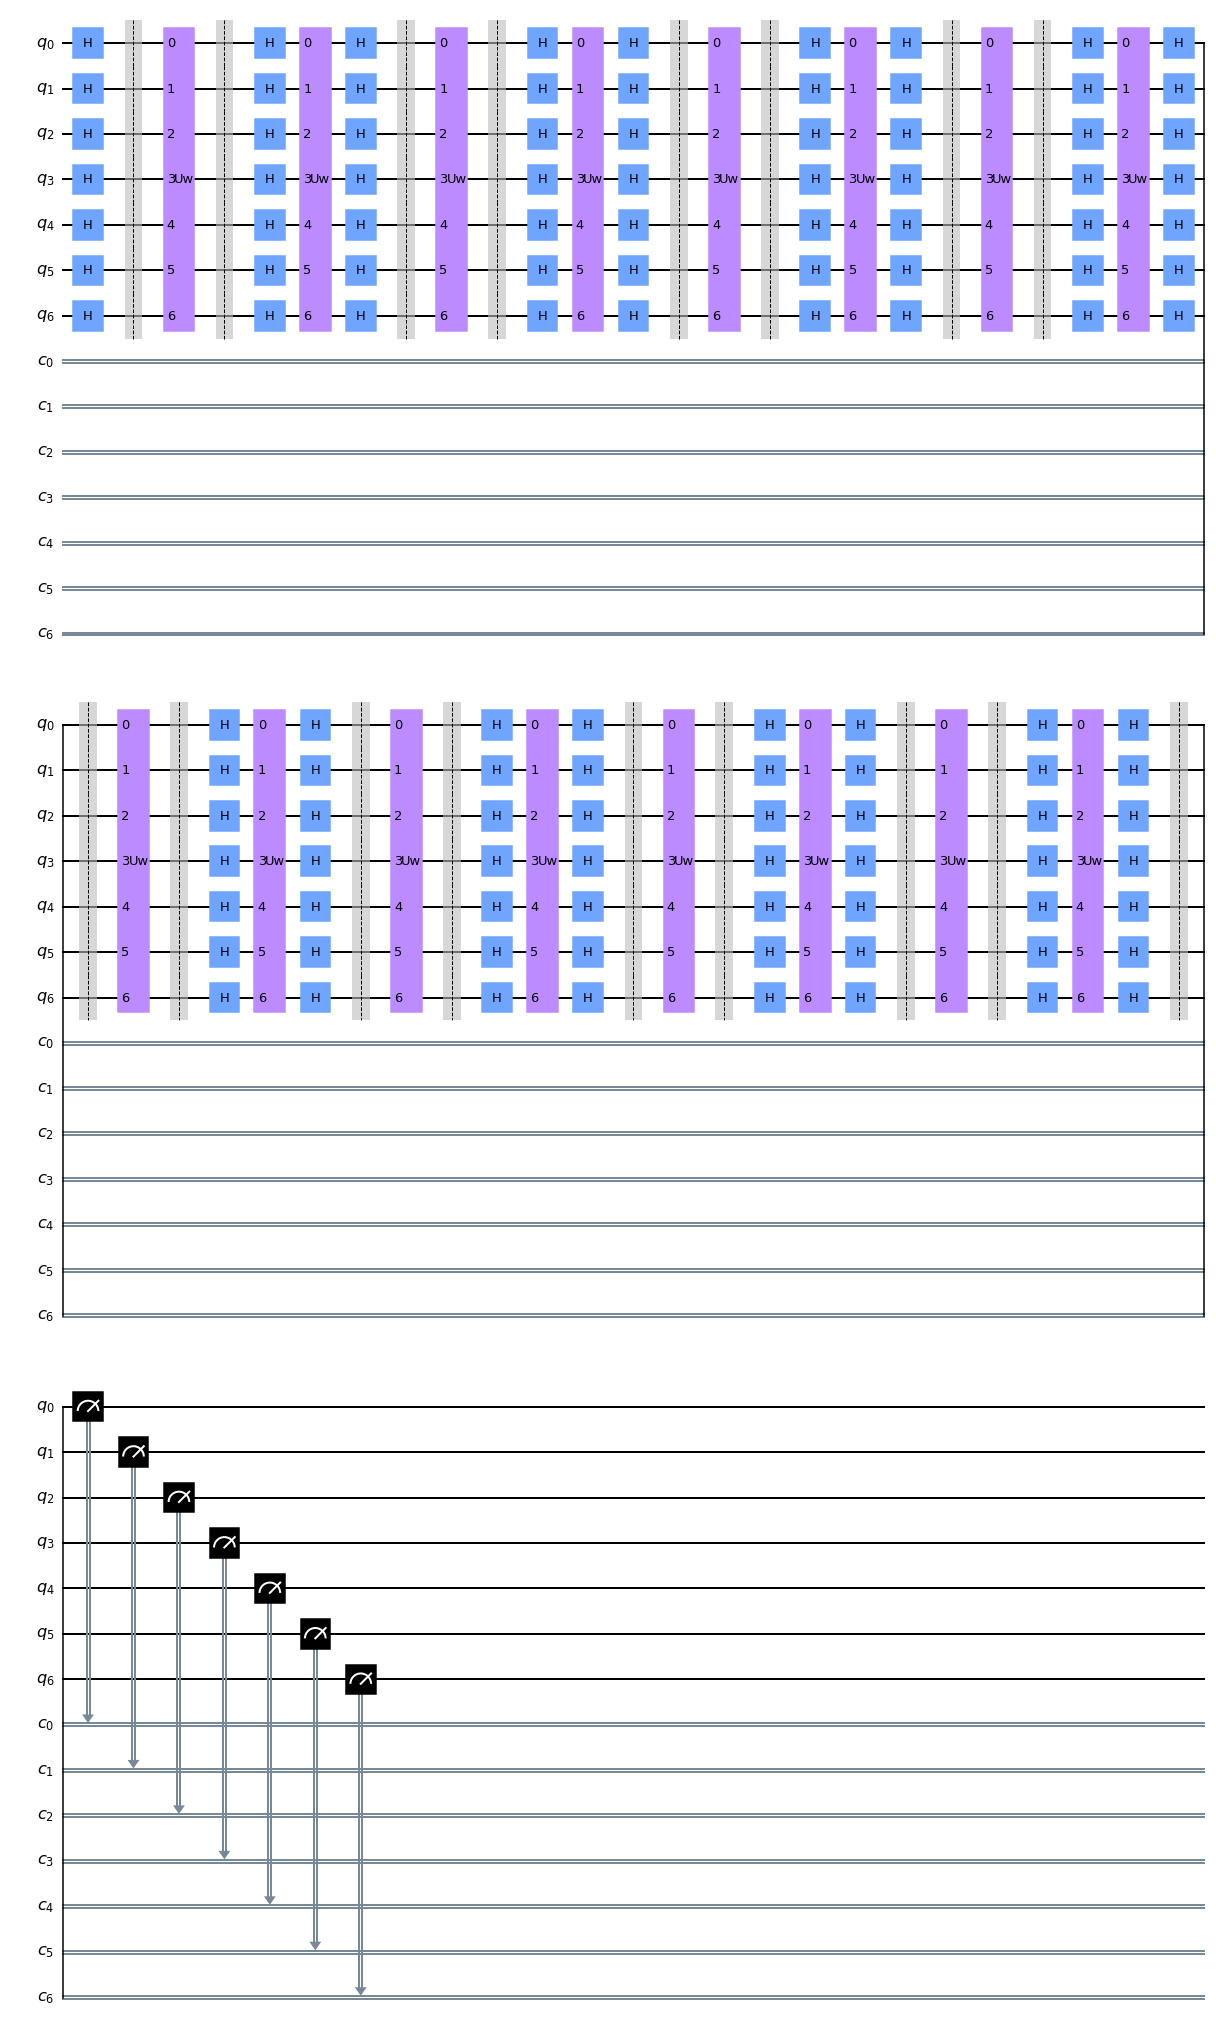

In [12]:
for i in range(n):
    qc.measure(i,i)
qc.draw('mpl',cregbundle=False)

# QasmSimulator

In [13]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

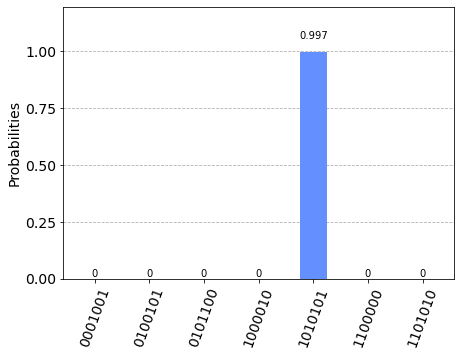

In [14]:
result = QasmSimulator().run(transpile(qc,QasmSimulator()),shots=2048).result()
counts = result.get_counts()
plot_histogram(counts)